In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns


import warnings
warnings.filterwarnings('ignore')

In [2]:
pd.set_option("display.max_columns",None)
data = pd.read_csv("weatherAUS.csv")
data.head()

,Date,Location,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,WindDir3pm,WindSpeed9am,WindSpeed3pm,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,RainTomorrow
0,2008-12-01,Albury,13.4,22.9,0.6,NaN,NaN,W,44.0,W,WNW,20.0,24.0,71.0,22.0,1007.7,1007.1,8.0,NaN,16.9,21.8,No,No
1,2008-12-02,Albury,7.4,25.1,0.0,NaN,NaN,WNW,44.0,NNW,WSW,4.0,22.0,44.0,25.0,1010.6,1007.8,NaN,NaN,17.2,24.3,No,No
2,2008-12-03,Albury,12.9,25.7,0.0,NaN,NaN,WSW,46.0,W,WSW,19.0,26.0,38.0,30.0,1007.6,1008.7,NaN,2.0,21.0,23.2,No,No
3,2008-12-04,Albury,9.2,28.0,0.0,NaN,NaN,NE,24.0,SE,E,11.0,9.0,45.0,16.0,1017.6,1012.8,NaN,NaN,18.1,26.5,No,No
4,2008-12-05,Albury,17.5,32.3,1.0,NaN,NaN,W,41.0,ENE,NW,7.0,20.0,82.0,33.0,1010.8,1006.0,7.0,8.0,17.8,29.7,No,No


In [3]:
#Lets check the shape of the dataset
data.shape

(8425, 23)

In [4]:
data.describe()

,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustSpeed,WindSpeed9am,WindSpeed3pm,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm
count,8350.000000,8365.000000,8185.000000,4913.000000,4431.000000,7434.000000,8349.000000,8318.000000,8366.000000,8323.000000,7116.000000,7113.000000,6004.000000,5970.000000,8369.000000,8329.000000
mean,13.193305,23.859976,2.805913,5.389395,7.632205,40.174469,13.847646,18.533662,67.822496,51.249790,1017.640233,1015.236075,4.566622,4.503183,17.762015,22.442934
std,5.403596,6.136408,10.459379,5.044484,3.896235,14.665721,10.174579,9.766986,16.833283,18.423774,6.828699,6.766681,2.877658,2.731659,5.627035,5.980020
min,-2.000000,8.200000,0.000000,0.000000,0.000000,7.000000,0.000000,0.000000,10.000000,6.000000,989.800000,982.900000,0.000000,0.000000,1.900000,7.300000
25%,9.200000,19.300000,0.000000,2.600000,4.750000,30.000000,6.000000,11.000000,56.000000,39.000000,1013.000000,1010.400000,1.000000,2.000000,13.800000,18.000000
50%,13.300000,23.300000,0.000000,4.600000,8.700000,39.000000,13.000000,19.000000,68.000000,51.000000,1017.700000,1015.300000,5.000000,5.000000,17.800000,21.900000
75%,17.400000,28.000000,1.000000,7.000000,10.700000,50.000000,20.000000,24.000000,80.000000,63.000000,1022.300000,1019.800000,7.000000,7.000000,21.900000,26.400000
max,28.500000,45.500000,371.000000,145.000000,13.900000,107.000000,63.000000,83.000000,100.000000,99.000000,1039.000000,1036.000000,8.000000,8.000000,39.400000,44.100000


In [5]:
#Lets check for isnull
data.isna().sum()

,0
Date,0
Location,0
MinTemp,75
MaxTemp,60
Rainfall,240
Evaporation,3512
Sunshine,3994
WindGustDir,991
WindGustSpeed,991
WindDir9am,829


Here we can see that we have null values.

## **Data PreProcessing**

### **Filling null values with mean values**

In [6]:
#Filling null values in MinTemp with it's mean
data['MinTemp'] = data['MinTemp'].fillna(data['MinTemp'].mean())

#Filling null values in MaxTemp with it's mean
data['MaxTemp'] = data['MaxTemp'].fillna(data['MaxTemp'].mean())

#Filling null values in Rainfall with it's mean
data['Rainfall'] = data['Rainfall'].fillna(data['Rainfall'].mean())

#Filling null values in Evaporation with it's mean
data['Evaporation'] = data['Evaporation'].fillna(data['Evaporation'].mean())

#Filling null values in Sunshine with it's mean
data['Sunshine'] = data['Sunshine'].fillna(data['Sunshine'].mean())

#Filling null values in WindGustDir with it's mean
data['WindGustDir'] = data['WindGustDir'].fillna(data['WindGustDir'].mode()[0])

#Filling null values in WindGustSpeed with it's mean
data['WindGustSpeed'] = data['WindGustSpeed'].fillna(data['WindGustSpeed'].mean())

#Filling null values in WindDir9am with it's mean
data['WindDir9am'] = data['WindDir9am'].fillna(data['WindDir9am'].mode()[0])

#Filling null values in WindDir3pm with it's mean
data['WindDir3pm'] = data['WindDir3pm'].fillna(data['WindDir3pm'].mode()[0])

#Filling null values in WindSpeed9am with it's mean
data['WindSpeed9am'] = data['WindSpeed9am'].fillna(data['WindSpeed9am'].mean())

#Filling null values in WindSpeed3pm with it's mean
data['WindSpeed3pm'] = data['WindSpeed3pm'].fillna(data['WindSpeed3pm'].mean())

#Filling null values in Humidity9am with it's mean
data['Humidity9am'] = data['Humidity9am'].fillna(data['Humidity9am'].mean())

#Filling null values in Humidity3pm with it's mean
data['Humidity3pm'] = data['Humidity3pm'].fillna(data['Humidity3pm'].mean())

#Filling null values in Pressure9am with it's mean
data['Pressure9am'] = data['Pressure9am'].fillna(data['Pressure9am'].mean())

#Filling null values in Pressure3pm with it's mean
data['Pressure3pm'] = data['Pressure3pm'].fillna(data['Pressure3pm'].mean())

#Filling null values in Cloud9am with it's mean
data['Cloud9am'] = data['Cloud9am'].fillna(data['Cloud9am'].mean())

#Filling null values in Cloud3pm with it's mean
data['Cloud3pm'] = data['Cloud3pm'].fillna(data['Cloud3pm'].mean())

#Filling null values in Temp9am with it's mean
data['Temp9am'] = data['Temp9am'].fillna(data['Temp9am'].mean())

#Filling null values in Temp3pm with it's mean
data['Temp3pm'] = data['Temp3pm'].fillna(data['Temp3pm'].mean())

#Filling null values in RainToday with it's mean
data['RainToday'] = data['RainToday'].fillna(data['RainToday'].mode()[0])

#Filling null values in RainTomorrow with it's mean
data['RainTomorrow'] = data['RainTomorrow'].fillna(data['RainTomorrow'].mode()[0])

In [7]:
data.isnull().sum()

,0
Date,0
Location,0
MinTemp,0
MaxTemp,0
Rainfall,0
Evaporation,0
Sunshine,0
WindGustDir,0
WindGustSpeed,0
WindDir9am,0


In [8]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8425 entries, 0 to 8424
Data columns (total 23 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Date           8425 non-null   object 
 1   Location       8425 non-null   object 
 2   MinTemp        8425 non-null   float64
 3   MaxTemp        8425 non-null   float64
 4   Rainfall       8425 non-null   float64
 5   Evaporation    8425 non-null   float64
 6   Sunshine       8425 non-null   float64
 7   WindGustDir    8425 non-null   object 
 8   WindGustSpeed  8425 non-null   float64
 9   WindDir9am     8425 non-null   object 
 10  WindDir3pm     8425 non-null   object 
 11  WindSpeed9am   8425 non-null   float64
 12  WindSpeed3pm   8425 non-null   float64
 13  Humidity9am    8425 non-null   float64
 14  Humidity3pm    8425 non-null   float64
 15  Pressure9am    8425 non-null   float64
 16  Pressure3pm    8425 non-null   float64
 17  Cloud9am       8425 non-null   float64
 18  Cloud3pm

Here we can see that the Date column is in object dtype so we will have to convert it into datetime dtype.

In [9]:
#lets Convert in Date Time
data['Date'] = pd.to_datetime(data['Date'])

In [10]:
# Extracting Day from Date Column
data['Day'] = pd.to_datetime(data.Date, format="%d/%m/%Y").dt.day

# Extracting Month from Date Column
data['Month'] = pd.to_datetime(data.Date, format="%d/%m/%Y").dt.month

# Extracting Year from Date Column
data['Year'] = pd.to_datetime(data.Date, format="%d/%m/%Y").dt.year

In [11]:
#Lets Delete DATE Columns
data.drop(columns='Date',inplace=True)

In [12]:
data.head()

,Location,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,WindDir3pm,WindSpeed9am,WindSpeed3pm,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,RainTomorrow,Day,Month,Year
0,Albury,13.4,22.9,0.6,5.389395,7.632205,W,44.0,W,WNW,20.0,24.0,71.0,22.0,1007.7,1007.1,8.000000,4.503183,16.9,21.8,No,No,1,12,2008
1,Albury,7.4,25.1,0.0,5.389395,7.632205,WNW,44.0,NNW,WSW,4.0,22.0,44.0,25.0,1010.6,1007.8,4.566622,4.503183,17.2,24.3,No,No,2,12,2008
2,Albury,12.9,25.7,0.0,5.389395,7.632205,WSW,46.0,W,WSW,19.0,26.0,38.0,30.0,1007.6,1008.7,4.566622,2.000000,21.0,23.2,No,No,3,12,2008
3,Albury,9.2,28.0,0.0,5.389395,7.632205,NE,24.0,SE,E,11.0,9.0,45.0,16.0,1017.6,1012.8,4.566622,4.503183,18.1,26.5,No,No,4,12,2008
4,Albury,17.5,32.3,1.0,5.389395,7.632205,W,41.0,ENE,NW,7.0,20.0,82.0,33.0,1010.8,1006.0,7.000000,8.000000,17.8,29.7,No,No,5,12,2008


In [13]:
#Lets plot Data Description
data.describe().T

,count,mean,std,min,25%,50%,75%,max
MinTemp,8425.0,13.193305,5.379488,-2.0,9.300000,13.200000,17.300000,28.5
MaxTemp,8425.0,23.859976,6.114516,8.2,19.300000,23.300000,28.000000,45.5
Rainfall,8425.0,2.805913,10.309308,0.0,0.000000,0.000000,1.400000,371.0
Evaporation,8425.0,5.389395,3.852004,0.0,4.000000,5.389395,5.389395,145.0
Sunshine,8425.0,7.632205,2.825451,0.0,7.632205,7.632205,8.900000,13.9
WindGustSpeed,8425.0,40.174469,13.776101,7.0,31.000000,40.174469,48.000000,107.0
WindSpeed9am,8425.0,13.847646,10.128579,0.0,6.000000,13.000000,20.000000,63.0
WindSpeed3pm,8425.0,18.533662,9.704759,0.0,11.000000,19.000000,24.000000,83.0
Humidity9am,8425.0,67.822496,16.774231,10.0,56.000000,68.000000,80.000000,100.0
Humidity3pm,8425.0,51.249790,18.311894,6.0,39.000000,51.000000,63.000000,99.0


Rainfall, Evaporation, WindGustSpeed, WindSpeed9am, WindSpeed3pm are Have Outliers

## **Univariate Ananlysis**

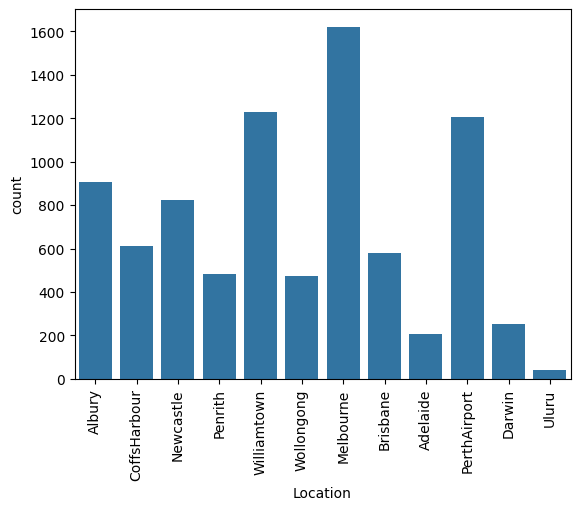

,count
Location,
Melbourne,1622
Williamtown,1230
PerthAirport,1204
Albury,907
Newcastle,822
CoffsHarbour,611
Brisbane,579
Penrith,482
Wollongong,474


In [14]:
sns.countplot(x='Location',data=data)
plt.xticks(rotation=90)
plt.show()
data.Location.value_counts()

We have the highest rainfall data from Melbourbne and least from Uluru.

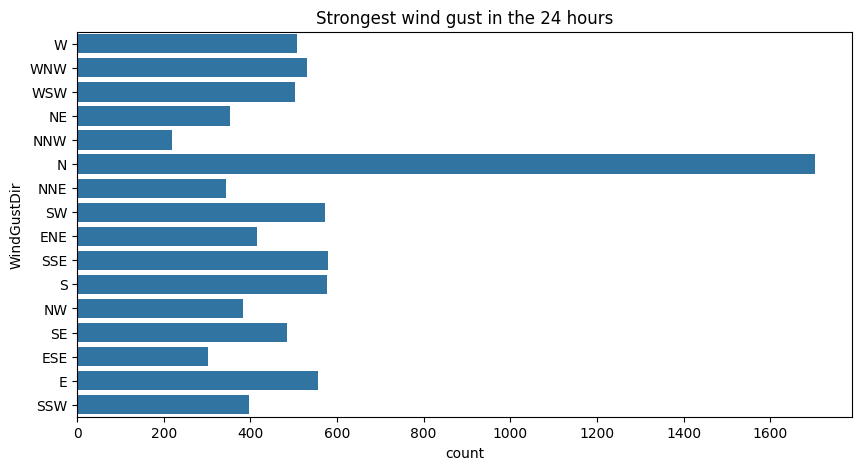

In [16]:
# Visualizing the direction of the strongest wind gust
plt.figure(figsize=(10,5))
sns.countplot(data["WindGustDir"])
plt.title("Strongest wind gust in the 24 hours")
plt.show()

We can clearly see that the wind gust was strongest towards the north.

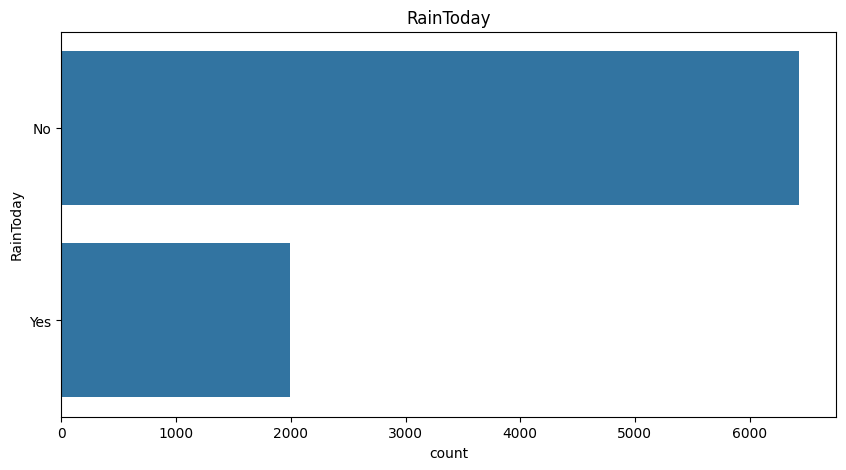

,count
RainToday,
No,6435
Yes,1990


In [15]:
#Visualization of Rain Today
plt.figure(figsize=(10,5))
sns.countplot(data["RainToday"])
plt.title("RainToday")
plt.show()
data.RainToday.value_counts()

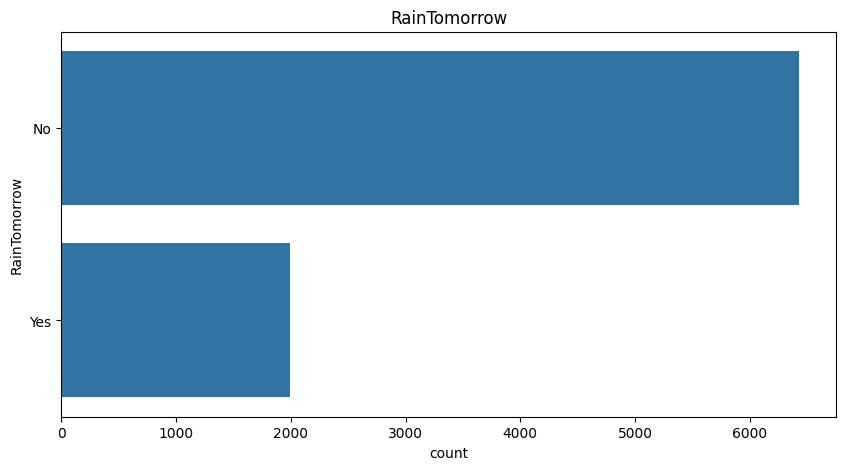

,count
RainTomorrow,
No,6434
Yes,1991


In [16]:
#Lets plot RainTommorow
plt.figure(figsize=(10,5))
sns.countplot(data["RainTomorrow"])
plt.title("RainTomorrow")
plt.show()
data.RainTomorrow.value_counts()

## **Bivariate Analysis**

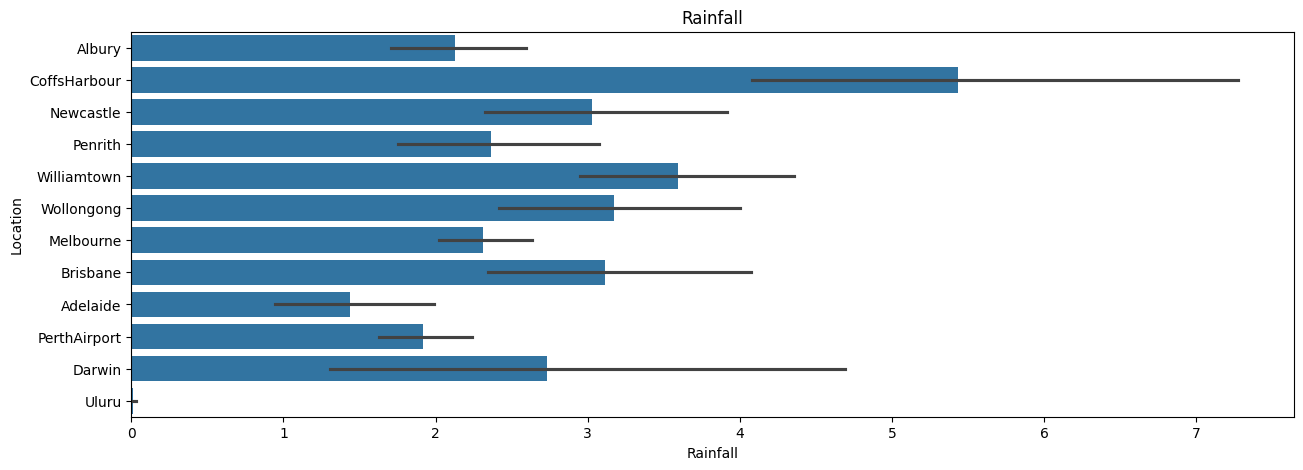

In [17]:
plt.figure(figsize=(15,5))
plt.title('Rainfall')
sns.barplot(x='Rainfall',y='Location',data=data)
plt.show()

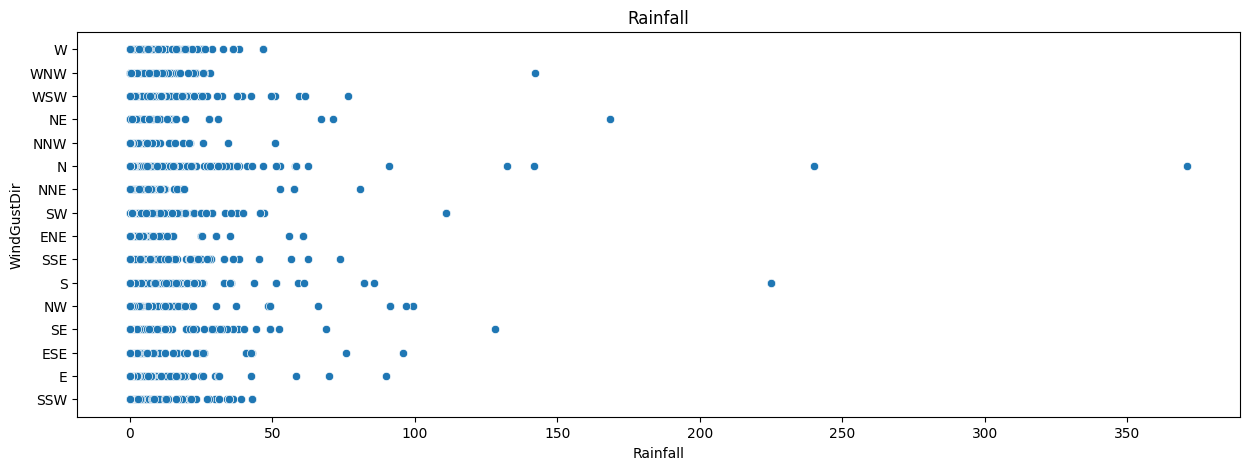

In [18]:
#checking the corelation between WindGustDir with Rainfall
plt.figure(figsize=(15,5))
plt.title('Rainfall')
sns.scatterplot(x='Rainfall',y='WindGustDir',data=data)
plt.show()

<Axes: xlabel='Year', ylabel='Rainfall'>

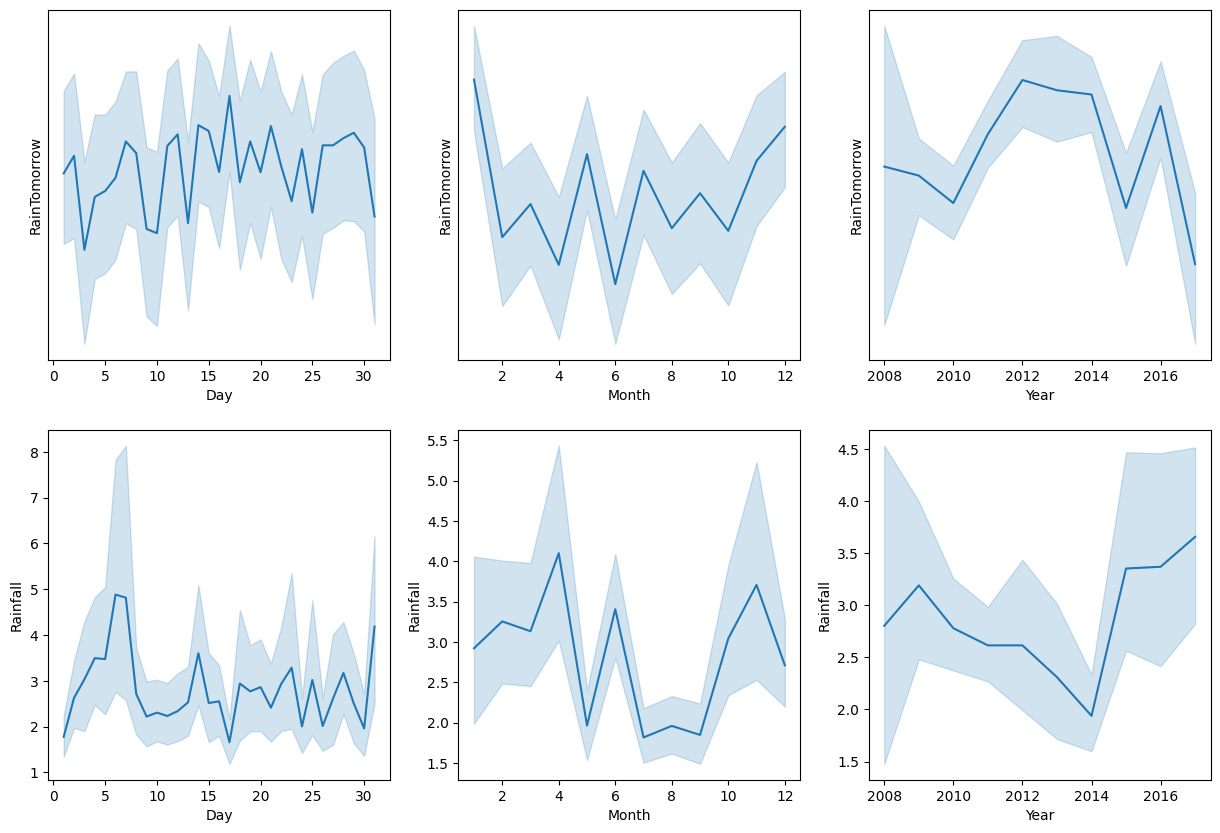

In [19]:
fig,axes=plt.subplots(2,3,figsize=(15,10))

#checking the relation between Day and RainTomorrow
sns.lineplot(x='Day',y='RainTomorrow',ax=axes[0,0],data=data)

#checking the relation between Month and RainTomorrow
sns.lineplot(x='Month',y='RainTomorrow',ax=axes[0,1],data=data)

#checking the relation between Year and RainTomorrow
sns.lineplot(x='Year',y='RainTomorrow',ax=axes[0,2],data=data)

#checking the relation between Day and Rainfall
sns.lineplot(x='Day',y='Rainfall',ax=axes[1,0],data=data)

#checking the relation between Month and Rainfall
sns.lineplot(x='Month',y='Rainfall',ax=axes[1,1],data=data)

#checking the relation between Year and Rainfall
sns.lineplot(x='Year',y='Rainfall',ax=axes[1,2],data=data)

<Axes: xlabel='Cloud3pm', ylabel='Rainfall'>

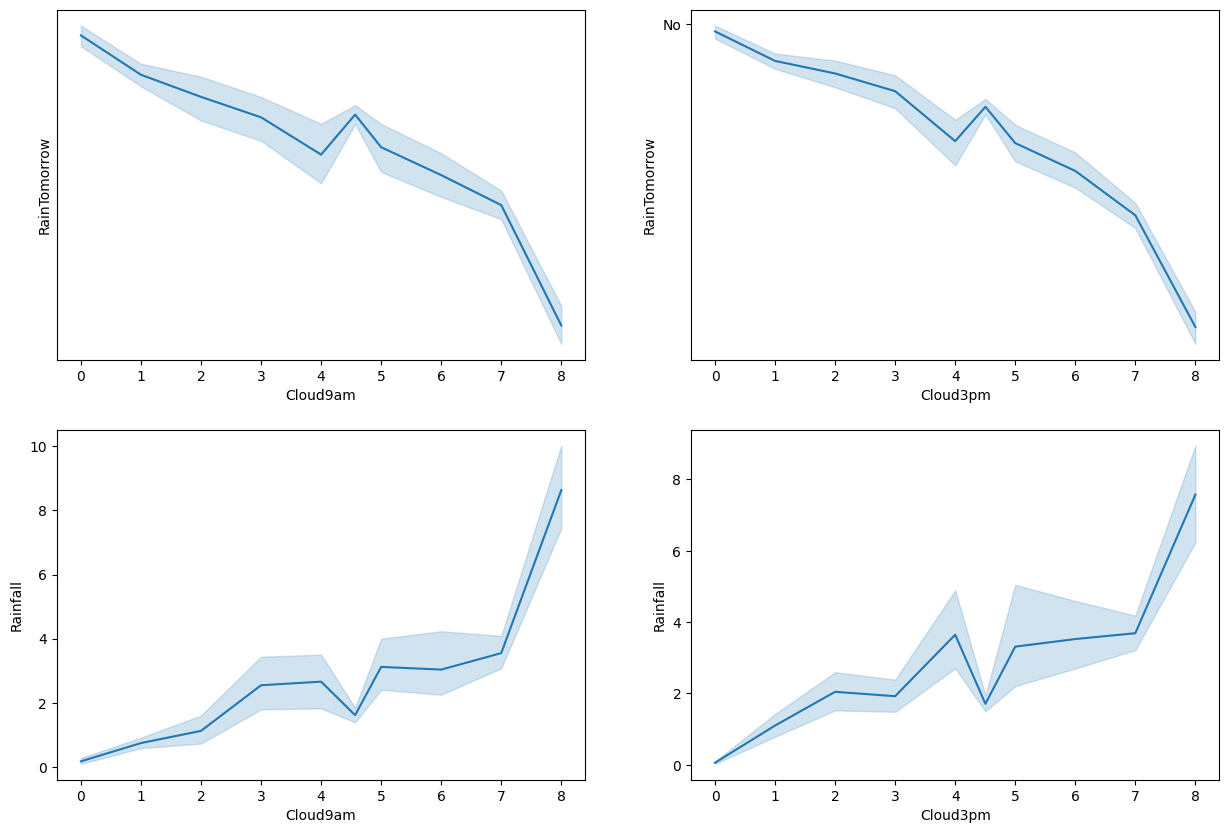

In [20]:
fig,axes=plt.subplots(2,2,figsize=(15,10))

#checking the relation between Cloud9am and RainTomorrow
sns.lineplot(x='Cloud9am',y='RainTomorrow',ax=axes[0,0],data=data)

#checking the relation between Cloud3pm and RainTomorrow
sns.lineplot(x='Cloud3pm',y='RainTomorrow',ax=axes[0,1],data=data)

#checking the relation between Cloud9am and Rainfall
sns.lineplot(x='Cloud9am',y='Rainfall',ax=axes[1,0],data=data)

#checking the relation between Cloud3pm and Rainfall
sns.lineplot(x='Cloud3pm',y='Rainfall',ax=axes[1,1],data=data)

1. Raintommorow and Cloud 9AM have Negative Relationship
2. Raintommorow and Cloud 3PM have Negative Relationship
3. Rainfall and Cloud 9AM have some positive relationship
4. Rainfall and Cloud 3PM have somee Positive Relationship

### **Identifying the Outliers**

In [21]:
# checking for numerical columns
num_col=[]
for i in data.dtypes.index:
    if data.dtypes[i]!='object':
        num_col.append(i)
print(num_col)

['MinTemp', 'MaxTemp', 'Rainfall', 'Evaporation', 'Sunshine', 'WindGustSpeed', 'WindSpeed9am', 'WindSpeed3pm', 'Humidity9am', 'Humidity3pm', 'Pressure9am', 'Pressure3pm', 'Cloud9am', 'Cloud3pm', 'Temp9am', 'Temp3pm', 'Day', 'Month', 'Year']


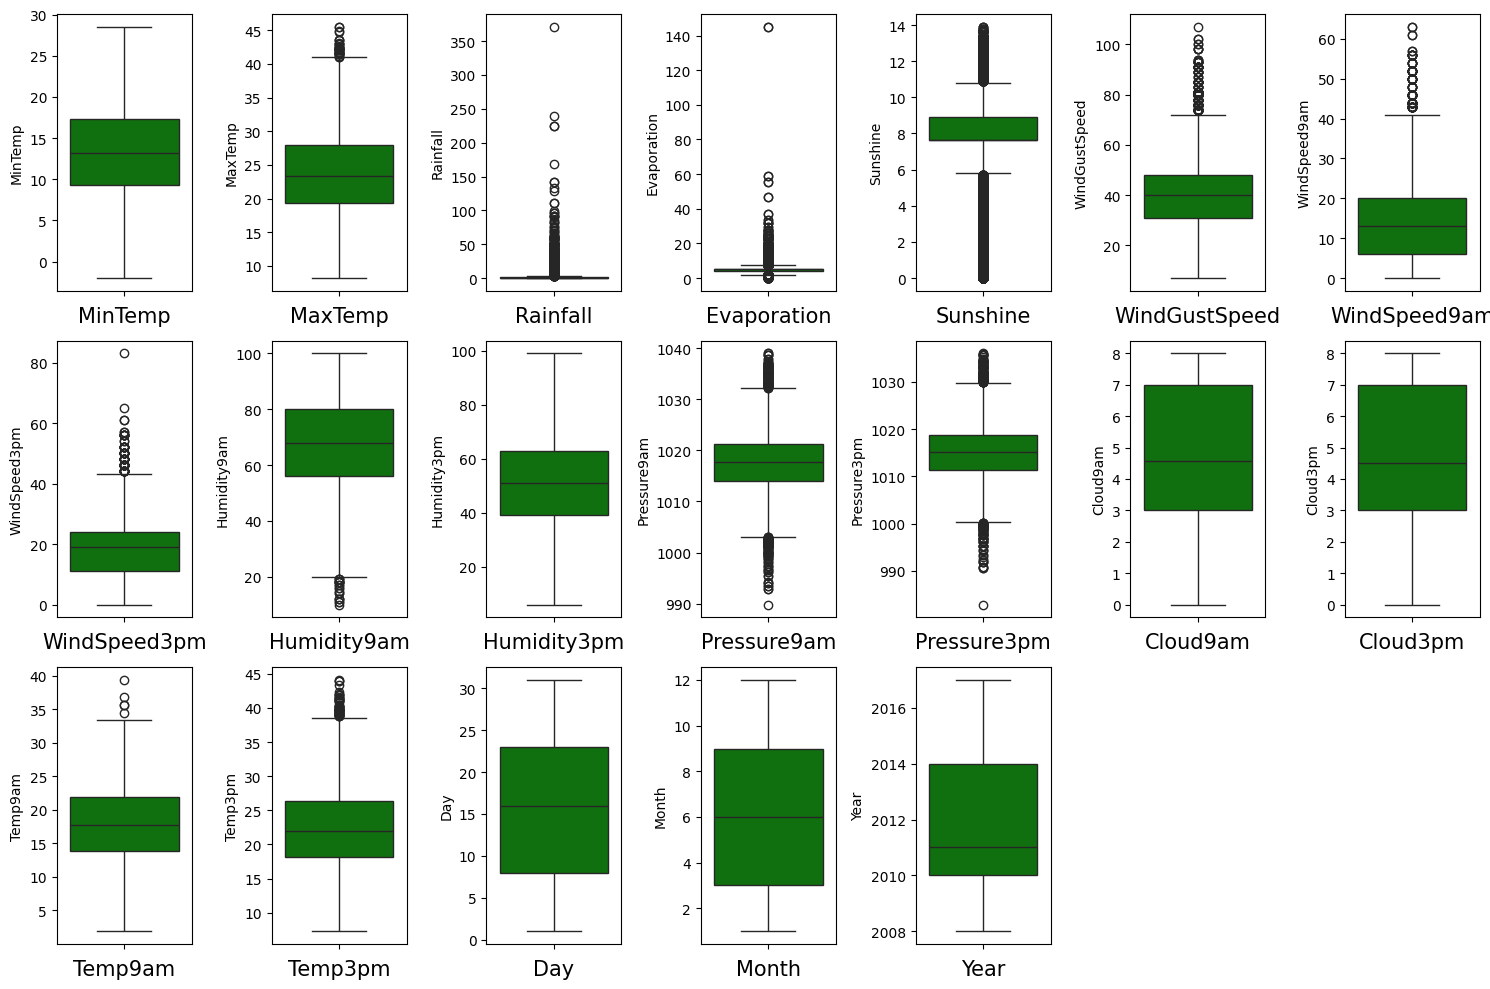

In [22]:
# Identifying the outliers using boxplot
plt.figure(figsize=(15,10),facecolor='white')
plotnumber=1
for column in num_col:
    if plotnumber<=20:
        ax=plt.subplot(3,7,plotnumber)
        sns.boxplot(data[column],color="green")
        plt.xlabel(column,fontsize=15)
    plotnumber+=1
plt.tight_layout()

From here we can see that MaxTemp, Rainfall, Evaporation, Sunshine, WindGustSpeed, WindSpeed9am, WindSpeed3pm, Humidity9am, Pressure9am, Pressure3pm, Temp9am, Temp3pm have outliers.

### **Removing Outliers**

**1. ZScore**

In [23]:
from scipy.stats import zscore
feature = data[['MaxTemp','Rainfall','Evaporation','Sunshine','WindGustSpeed','WindSpeed9am','WindSpeed3pm','Humidity9am','Pressure9am','Pressure3pm','Temp9am','Temp3pm']]

z=np.abs(zscore(feature))
# Creating new dataframe
df_zscore = data[(z<3).all(axis=1)]
df_zscore

,Location,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,WindDir3pm,WindSpeed9am,WindSpeed3pm,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,RainTomorrow,Day,Month,Year
0,Albury,13.4,22.900000,0.6,5.389395,7.632205,W,44.000000,W,WNW,20.0,24.0,71.0,22.0,1007.7,1007.1,8.000000,4.503183,16.9,21.8,No,No,1,12,2008
1,Albury,7.4,25.100000,0.0,5.389395,7.632205,WNW,44.000000,NNW,WSW,4.0,22.0,44.0,25.0,1010.6,1007.8,4.566622,4.503183,17.2,24.3,No,No,2,12,2008
2,Albury,12.9,25.700000,0.0,5.389395,7.632205,WSW,46.000000,W,WSW,19.0,26.0,38.0,30.0,1007.6,1008.7,4.566622,2.000000,21.0,23.2,No,No,3,12,2008
3,Albury,9.2,28.000000,0.0,5.389395,7.632205,NE,24.000000,SE,E,11.0,9.0,45.0,16.0,1017.6,1012.8,4.566622,4.503183,18.1,26.5,No,No,4,12,2008
4,Albury,17.5,32.300000,1.0,5.389395,7.632205,W,41.000000,ENE,NW,7.0,20.0,82.0,33.0,1010.8,1006.0,7.000000,8.000000,17.8,29.7,No,No,5,12,2008
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8420,Uluru,2.8,23.400000,0.0,5.389395,7.632205,E,31.000000,SE,ENE,13.0,11.0,51.0,24.0,1024.6,1020.3,4.566622,4.503183,10.1,22.4,No,No,21,6,2017
8421,Uluru,3.6,25.300000,0.0,5.389395,7.632205,NNW,22.000000,SE,N,13.0,9.0,56.0,21.0,1023.5,1019.1,4.566622,4.503183,10.9,24.5,No,No,22,6,2017
8422,Uluru,5.4,26.900000,0.0,5.389395,7.632205,N,37.000000,SE,WNW,9.0,9.0,53.0,24.0,1021.0,1016.8,4.566622,4.503183,12.5,26.1,No,No,23,6,2017
8423,Uluru,7.8,27.000000,0.0,5.389395,7.632205,SE,28.000000,SSE,N,13.0,7.0,51.0,24.0,1019.4,1016.5,3.000000,2.000000,15.1,26.0,No,No,24,6,2017


In [24]:
# Shape of original dataset
data.shape

(8425, 25)

In [25]:
#After Removing Outliers
df_zscore.shape

(7987, 25)

This is the new dataframe after removing the outliers. Here we have removed the outliers whose Zscore is less than 3

In [26]:
#Percentage data loss:
loss_percent=(8425-7987)/8425*100
print(loss_percent,'%')

5.198813056379822 %


After removing Outliers with ZScore we loss almost 5% of the data.

**2. IQR (Inter Quantile Range) method**

In [27]:
Q1 = feature.quantile(0.25)
Q3 = feature.quantile(0.75)
IQR = Q3 - Q1

df_iqr = feature[~((feature < (Q1 - 1.5 * IQR)) |(feature > (Q3 + 1.5 * IQR))).any(axis=1)]

In [28]:
df_iqr

,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustSpeed,WindSpeed9am,WindSpeed3pm,Humidity9am,Pressure9am,Pressure3pm,Temp9am,Temp3pm
0,22.900000,0.6,5.389395,7.632205,44.000000,20.0,24.0,71.0,1007.7,1007.1,16.9,21.8
1,25.100000,0.0,5.389395,7.632205,44.000000,4.0,22.0,44.0,1010.6,1007.8,17.2,24.3
2,25.700000,0.0,5.389395,7.632205,46.000000,19.0,26.0,38.0,1007.6,1008.7,21.0,23.2
3,28.000000,0.0,5.389395,7.632205,24.000000,11.0,9.0,45.0,1017.6,1012.8,18.1,26.5
4,32.300000,1.0,5.389395,7.632205,41.000000,7.0,20.0,82.0,1010.8,1006.0,17.8,29.7
...,...,...,...,...,...,...,...,...,...,...,...,...
8420,23.400000,0.0,5.389395,7.632205,31.000000,13.0,11.0,51.0,1024.6,1020.3,10.1,22.4
8421,25.300000,0.0,5.389395,7.632205,22.000000,13.0,9.0,56.0,1023.5,1019.1,10.9,24.5
8422,26.900000,0.0,5.389395,7.632205,37.000000,9.0,9.0,53.0,1021.0,1016.8,12.5,26.1
8423,27.000000,0.0,5.389395,7.632205,28.000000,13.0,7.0,51.0,1019.4,1016.5,15.1,26.0


In [29]:
# Shape of original dataset
data.shape

(8425, 25)

In [30]:
#After Removing Outliers
df_iqr.shape

(4221, 12)

In [31]:
# Checking the the data loss
data_loss = (8425-4221)/8425*100
data_loss

49.89910979228487

After removing Outliers with IQR we loss almost 50% of the data. So we will go forward with ZScore moethod.

### **Encoding the categorical columns using Label Encoding**

In [32]:
# Encode categorical columns using Label Encoding
from sklearn.preprocessing import LabelEncoder
label_encoders = {}
for column in df_zscore.select_dtypes(include=['object']).columns:
    label_encoders[column] = LabelEncoder()
    df_zscore[column] = label_encoders[column].fit_transform(df_zscore[column])

In [33]:
df_zscore

,Location,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,WindDir3pm,WindSpeed9am,WindSpeed3pm,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,RainTomorrow,Day,Month,Year
0,1,13.4,22.900000,0.6,5.389395,7.632205,13,44.000000,13,14,20.0,24.0,71.0,22.0,1007.7,1007.1,8.000000,4.503183,16.9,21.8,0,0,1,12,2008
1,1,7.4,25.100000,0.0,5.389395,7.632205,14,44.000000,6,15,4.0,22.0,44.0,25.0,1010.6,1007.8,4.566622,4.503183,17.2,24.3,0,0,2,12,2008
2,1,12.9,25.700000,0.0,5.389395,7.632205,15,46.000000,13,15,19.0,26.0,38.0,30.0,1007.6,1008.7,4.566622,2.000000,21.0,23.2,0,0,3,12,2008
3,1,9.2,28.000000,0.0,5.389395,7.632205,4,24.000000,9,0,11.0,9.0,45.0,16.0,1017.6,1012.8,4.566622,4.503183,18.1,26.5,0,0,4,12,2008
4,1,17.5,32.300000,1.0,5.389395,7.632205,13,41.000000,1,7,7.0,20.0,82.0,33.0,1010.8,1006.0,7.000000,8.000000,17.8,29.7,0,0,5,12,2008
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8420,9,2.8,23.400000,0.0,5.389395,7.632205,0,31.000000,9,1,13.0,11.0,51.0,24.0,1024.6,1020.3,4.566622,4.503183,10.1,22.4,0,0,21,6,2017
8421,9,3.6,25.300000,0.0,5.389395,7.632205,6,22.000000,9,3,13.0,9.0,56.0,21.0,1023.5,1019.1,4.566622,4.503183,10.9,24.5,0,0,22,6,2017
8422,9,5.4,26.900000,0.0,5.389395,7.632205,3,37.000000,9,14,9.0,9.0,53.0,24.0,1021.0,1016.8,4.566622,4.503183,12.5,26.1,0,0,23,6,2017
8423,9,7.8,27.000000,0.0,5.389395,7.632205,9,28.000000,10,3,13.0,7.0,51.0,24.0,1019.4,1016.5,3.000000,2.000000,15.1,26.0,0,0,24,6,2017


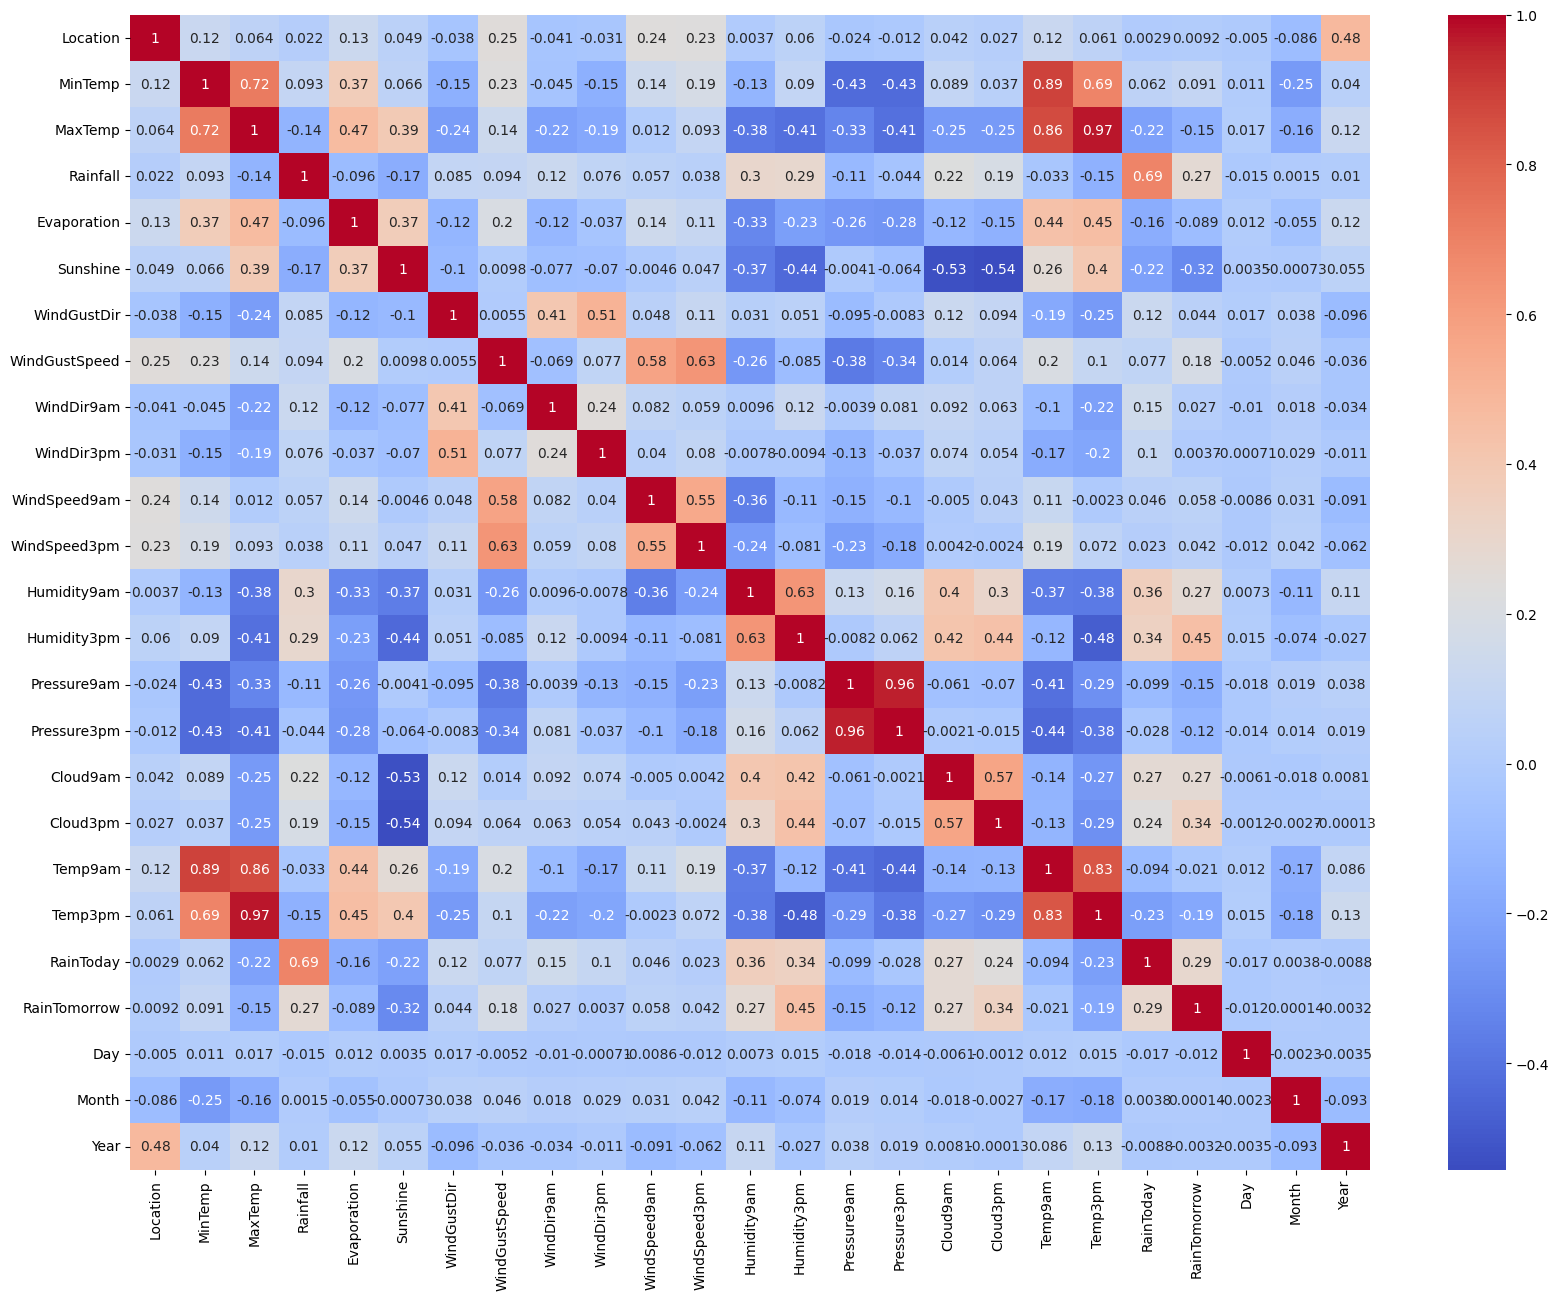

In [34]:
# Check the correlation between features and target variable, and visualize using a heatmap
corr_matrix = df_zscore.corr()
plt.figure(figsize=(20,15))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm')
plt.show()

## **Model Building**

### **Problem Statement: a) Design a predictive model with the use of machine learning algorithms to forecast whether or not it will rain tomorrow.**

### **Checking for skewness**

In [35]:
df_zscore.skew()

,0
Location,-0.040284
MinTemp,-0.084549
MaxTemp,0.314510
Rainfall,3.488446
Evaporation,0.846181
Sunshine,-0.723970
WindGustDir,0.112339
WindGustSpeed,0.506897
WindDir9am,0.160081
WindDir3pm,-0.126255


In [36]:
x = df_zscore.drop(columns=['RainTomorrow'])
y = df_zscore.RainTomorrow

### **Removing Skewness**

In [37]:
from sklearn.preprocessing import PowerTransformer
pt = PowerTransformer()

In [38]:
pt.fit_transform(x)

array([[-1.56842088e+00,  6.05015740e-02, -7.57272296e-02, ...,
        -1.88561223e+00,  1.52402297e+00, -2.43360887e-13],
       [-1.56842088e+00, -1.05725282e+00,  2.87144714e-01, ...,
        -1.70313125e+00,  1.52402297e+00, -2.43360887e-13],
       [-1.56842088e+00, -3.22219600e-02,  3.82999789e-01, ...,
        -1.53666417e+00,  1.52402297e+00, -2.43360887e-13],
       ...,
       [ 1.01632853e+00, -1.43299533e+00,  5.71022930e-01, ...,
         8.36217054e-01, -4.67179920e-02,  2.91655589e-13],
       [ 1.01632853e+00, -9.82333711e-01,  5.86477671e-01, ...,
         9.34619491e-01, -4.67179920e-02,  2.91655589e-13],
       [ 1.01632853e+00,  3.38295674e-01,  8.49017248e-02, ...,
         1.03196621e+00, -4.67179920e-02,  2.91655589e-13]])

### **Feature Scaling**

In [39]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
x_scaler = scaler.fit_transform(x)

In [40]:
x_scaler

array([[-1.50842735,  0.05644354, -0.14573194, ..., -1.6716567 ,
         1.63411265, -1.66131549],
       [-1.50842735, -1.05847646,  0.22067594, ..., -1.55797642,
         1.63411265, -1.66131549],
       [-1.50842735, -0.03646646,  0.32060536, ..., -1.44429613,
         1.63411265, -1.66131549],
       ...,
       [ 1.02942282, -1.43011646,  0.5204642 , ...,  0.82930956,
        -0.12372583,  2.00413391],
       [ 1.02942282, -0.98414846,  0.5371191 , ...,  0.94298985,
        -0.12372583,  2.00413391],
       [ 1.02942282,  0.33517354,  0.01415115, ...,  1.05667013,
        -0.12372583,  2.00413391]])

### **Checking VIF- Variance Inflation Factor values**

In [41]:
#Lets check VIF
from statsmodels.stats.outliers_influence import variance_inflation_factor
vif=pd.DataFrame()
vif['Score'] = [variance_inflation_factor(x_scaler,i) for i in range(x_scaler.shape[1])]
vif['features'] = x.columns
vif

,Score,features
0,1.571687,Location
1,8.796643,MinTemp
2,26.428053,MaxTemp
3,1.955520,Rainfall
4,1.543211,Evaporation
5,1.939243,Sunshine
6,1.615820,WindGustDir
7,2.317971,WindGustSpeed
8,1.352548,WindDir9am
9,1.484028,WindDir3pm


Here we can see that we have multicollinearity.

### **Selecting Kbest Features**

In [42]:
from sklearn.feature_selection import SelectKBest, f_classif

In [43]:
bestfeat = SelectKBest(score_func = f_classif, k = 'all')
fit = bestfeat.fit(x_scaler,y)
dfscores = pd.DataFrame(fit.scores_)
dfcolumns = pd.DataFrame(x.columns)

In [44]:
fit = bestfeat.fit(x_scaler,y)
dfscores = pd.DataFrame(fit.scores_)
dfcolumns = pd.DataFrame(x.columns)
dfcolumns.head()
featureScores = pd.concat([dfcolumns,dfscores],axis = 1)
featureScores.columns = ['Feature', 'Score']
print(featureScores.nlargest(35,'Score'))

          Feature        Score
13    Humidity3pm  1981.530539
17       Cloud3pm  1029.364731
5        Sunshine   896.276633
20      RainToday   758.469769
3        Rainfall   630.793731
12    Humidity9am   626.486365
16       Cloud9am   625.864340
19        Temp3pm   304.653895
7   WindGustSpeed   271.937255
14    Pressure9am   190.612047
2         MaxTemp   183.065685
15    Pressure3pm   126.648542
1         MinTemp    66.707542
4     Evaporation    64.282695
10   WindSpeed9am    26.889499
6     WindGustDir    15.756523
11   WindSpeed3pm    14.429616
8      WindDir9am     5.864766
18        Temp9am     3.678533
21            Day     1.246468
0        Location     0.679184
9      WindDir3pm     0.107778
23           Year     0.080770
22          Month     0.000146


Here we can see that Humidity3pm, Cloud3pm, Sunshine, etc have more relation where as Location, WindDir3pm, Year and Month have less relation. But we will not remove that because all the features are imp for prediction.

### **SMOTE**

In [45]:
y.value_counts()

,count
RainTomorrow,
0,6165
1,1822


We can see that there is a significant difference in the classes hence lets fix this using SMOTE to avoid any bias.

In [46]:
from imblearn.over_sampling import SMOTE
sm = SMOTE()

In [47]:
x_scaler, y = sm.fit_resample(x_scaler,y)

In [48]:
y.value_counts()

,count
RainTomorrow,
0,6165
1,6165


### **Train Test Split**

In [49]:
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

### **1. Logistic Regression**

In [50]:
from sklearn.linear_model import LogisticRegression

In [51]:
x_train, x_test, y_train, y_test = train_test_split(x_scaler, y, test_size=0.2, random_state=723)

In [52]:
x_train.shape

(9864, 24)

In [53]:
y_train.shape

(9864,)

In [54]:
x_test.shape

(2466, 24)

In [55]:
y_test.shape

(2466,)

In [57]:
lr = LogisticRegression()

In [58]:
lr.fit(x_train,y_train)

LogisticRegression()

In [59]:
y_pred = lr.predict(x_test)
y_pred

array([0, 1, 1, ..., 0, 0, 0])

In [60]:
accuracy = accuracy_score(y_test,y_pred)
print(accuracy)

0.7858880778588808


In [61]:
#Confusion Matrix
conf_mat = confusion_matrix(y_test,y_pred)
conf_mat

array([[996, 222],
       [306, 942]])

**Hyperparameter Tuning**

In [62]:
from sklearn.model_selection import GridSearchCV

In [63]:
param_grid = [
    {'penalty' : ['l1', 'l2', 'elasticnet', 'none'],
    'C' : np.logspace(-4, 4, 20),
    'solver' : ['lbfgs','newton-cg','liblinear','sag','saga'],
    'max_iter' : [100, 1000,2500, 5000]
    }
]

In [64]:
clf = GridSearchCV(lr, param_grid = param_grid, cv = 3, verbose=True, n_jobs=-1)

In [65]:
best_clf = clf.fit(x_scaler,y)

Fitting 3 folds for each of 1600 candidates, totalling 4800 fits


In [66]:
best_clf.best_estimator_

LogisticRegression(C=0.0018329807108324356, penalty='l1', solver='saga')

In [67]:
css=LogisticRegression(C=0.0018329807108324356, penalty='l1', solver='saga')

In [68]:
css.fit(x_train,y_train)

LogisticRegression(C=0.0018329807108324356, penalty='l1', solver='saga')

In [69]:
y_pred_css = css.predict(x_test)
y_pred_css

array([0, 1, 1, ..., 0, 0, 0])

In [70]:
accuracy_css = accuracy_score(y_test,y_pred_css)
print(accuracy_css)

0.7700729927007299


In [71]:
print(f"Accuracy score before Hyperparameter Tuning : {accuracy}")
print(f"Accuracy score after Hyperparameter Tuning :  {accuracy_css}")

Accuracy score before Hyperparameter Tuning : 0.7858880778588808
Accuracy score after Hyperparameter Tuning :  0.7700729927007299


Here we can see that accuracy score before Hyperparameter Tuning is slighty better.

### **2. Decision Tree**

In [72]:
from sklearn.tree import DecisionTreeClassifier

In [73]:
cnn=DecisionTreeClassifier()

In [74]:
x_train, x_test, y_train, y_test = train_test_split(x_scaler, y, test_size=0.2, random_state=431)

In [75]:
#Train the model
cnn.fit(x_train,y_train)

DecisionTreeClassifier()

In [76]:
def metrics_score(cnn,x_train,x_test,y_train,y_test,train=True):
    if train:
        y_pred=cnn.predict(x_train)
        print("==================Training Score=================")
        print("Accuracy Score == >  ", accuracy_score(y_train,y_pred)*100)
    elif train==False:
        pred=cnn.predict(x_test)
        print("=================Test Score======================")
        print("Accuracy Score===>  ",accuracy_score(y_test,pred)*100)
        print("Classification Report==>",classification_report(y_test,pred))

In [77]:
#Call the function and pass dataset to check train and test score
metrics_score(cnn,x_train,x_test,y_train,y_test,train=True)
metrics_score(cnn,x_train,x_test,y_train,y_test,train=False)

==================Training Score=================
Accuracy Score == >   100.0
=================Test Score======================
Accuracy Score===>   88.28061638280616
Classification Report==>               precision    recall  f1-score   support

           0       0.89      0.88      0.88      1243
           1       0.88      0.88      0.88      1223

    accuracy                           0.88      2466
   macro avg       0.88      0.88      0.88      2466
weighted avg       0.88      0.88      0.88      2466



Overfitting because we can see that training score is 100%.

**Hyperparameter Tuning in Decision Tree**

In [78]:
#We are tuning four important hyperparameter right now, we are passing the different values for both paramters.


grid_param={
    'criterion':['ginni','entropy'],
    'max_depth': range(10,15),# The Maximum depth of the tree
    'min_samples_leaf':range(2,6),#The maximum number of samples required to be at a leaf node
    'min_samples_split':range(3,8),#The minimum numbers of sample required to split an internal node
    'max_leaf_nodes':range(5,10)}#Best nodes are defined as them unlimited number of leaf nodes


In [79]:
grid_search=GridSearchCV(estimator=cnn,
                         param_grid=grid_param,
                         cv=5,
                        n_jobs=-1)#use all the cores in your system for performance improvement

In [80]:
grid_search.fit(x_train,y_train)

GridSearchCV(cv=5, estimator=DecisionTreeClassifier(), n_jobs=-1,
             param_grid={'criterion': ['ginni', 'entropy'],
                         'max_depth': range(10, 15),
                         'max_leaf_nodes': range(5, 10),
                         'min_samples_leaf': range(2, 6),
                         'min_samples_split': range(3, 8)})

In [81]:
best_parameter=grid_search.best_params_
print(best_parameter)

{'criterion': 'entropy', 'max_depth': 10, 'max_leaf_nodes': 9, 'min_samples_leaf': 2, 'min_samples_split': 3}


In [82]:
#Initiate DecisionTreeClassifier with new parameter and train.

cnn=DecisionTreeClassifier(criterion='entropy', max_depth=10, max_leaf_nodes=8, min_samples_split= 3)

In [83]:
#Train the model
cnn.fit(x_train,y_train)

DecisionTreeClassifier(criterion='entropy', max_depth=10, max_leaf_nodes=8,
                       min_samples_split=3)

In [84]:
#Call the function and pass dataset to check train and test score
metrics_score(cnn,x_train,x_test,y_train,y_test,train=True)
metrics_score(cnn,x_train,x_test,y_train,y_test,train=False)

==================Training Score=================
Accuracy Score == >   73.78345498783455
=================Test Score======================
Accuracy Score===>   72.83049472830496
Classification Report==>               precision    recall  f1-score   support

           0       0.72      0.76      0.74      1243
           1       0.74      0.69      0.72      1223

    accuracy                           0.73      2466
   macro avg       0.73      0.73      0.73      2466
weighted avg       0.73      0.73      0.73      2466



### **3. Random Forest**

In [86]:
from sklearn.ensemble import RandomForestClassifier

In [87]:
rfc = RandomForestClassifier(n_estimators=10, random_state=0)

In [88]:
x_train, x_test, y_train, y_test = train_test_split(x_scaler, y, test_size=0.2, random_state=752)

In [89]:
rfc.fit(x_train, y_train)

RandomForestClassifier(n_estimators=10, random_state=0)

In [90]:
def metrics_score(rfc,x_train,x_test,y_train,y_test,train=True):
    if train:
        y_pred=rfc.predict(x_train)
        print("==================Training Score=================")
        print("Accuracy Score == >  ", accuracy_score(y_train,y_pred)*100)
    elif train==False:
        pred=rfc.predict(x_test)
        print("=================Test Score======================")
        print("Accuracy Score===>  ",accuracy_score(y_test,pred)*100)
        print("Classification Report==>",classification_report(y_test,pred))

In [91]:
#Call the function and pass dataset to check train and test score
metrics_score(rfc,x_train,x_test,y_train,y_test,train=True)
metrics_score(rfc,x_train,x_test,y_train,y_test,train=False)

==================Training Score=================
Accuracy Score == >   99.65531224655312
=================Test Score======================
Accuracy Score===>   92.25466342254663
Classification Report==>               precision    recall  f1-score   support

           0       0.91      0.94      0.92      1227
           1       0.94      0.90      0.92      1239

    accuracy                           0.92      2466
   macro avg       0.92      0.92      0.92      2466
weighted avg       0.92      0.92      0.92      2466



**Random Forest Classifier model with parameter n_estimators=100**

In [92]:
# instantiate the classifier with n_estimators = 100
rfc_100 = RandomForestClassifier(n_estimators=100, random_state=0)

# fit the model to the training set
rfc_100.fit(x_train, y_train)

RandomForestClassifier(random_state=0)

In [93]:
#Call the function and pass dataset to check train and test score
metrics_score(rfc_100,x_train,x_test,y_train,y_test,train=True)
metrics_score(rfc_100,x_train,x_test,y_train,y_test,train=False)

==================Training Score=================
Accuracy Score == >   100.0
=================Test Score======================
Accuracy Score===>   95.05271695052717
Classification Report==>               precision    recall  f1-score   support

           0       0.95      0.95      0.95      1227
           1       0.95      0.95      0.95      1239

    accuracy                           0.95      2466
   macro avg       0.95      0.95      0.95      2466
weighted avg       0.95      0.95      0.95      2466



The model accuracy score with 10 decision-trees is 92.25 but the same with 100 decision-trees is 95.05. So, as expected accuracy increases with number of decision-trees in the model.

So we can see that we got the highest accuracy in Random Forest Classifier model with parameter n_estimators=100 whuch is 95.05%.

In [94]:
import pickle
filename=('Rain Predict Model')
pickle.dump(rfc_100,open(filename,'wb'))

In [95]:
rfc_100_model = pickle.load(open('Rain Predict Model','rb'))

In [96]:
df_zscore.tail(10)

,Location,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,WindDir3pm,WindSpeed9am,WindSpeed3pm,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,RainTomorrow,Day,Month,Year
8415,9,5.2,24.300000,0.0,5.389395,7.632205,0,24.000000,9,0,11.0,11.0,53.0,24.0,1023.8,1020.0,4.566622,4.503183,12.3,23.3,0,0,16,6,2017
8416,9,6.4,23.400000,0.0,5.389395,7.632205,2,31.000000,8,2,15.0,17.0,53.0,25.0,1025.8,1023.0,4.566622,4.503183,11.2,23.1,0,0,17,6,2017
8417,9,8.0,20.700000,0.0,5.389395,7.632205,2,41.000000,9,0,19.0,26.0,56.0,32.0,1028.1,1024.3,4.566622,7.000000,11.6,20.0,0,0,18,6,2017
8418,9,7.4,20.600000,0.0,5.389395,7.632205,0,35.000000,2,0,15.0,17.0,63.0,33.0,1027.2,1023.3,4.566622,4.503183,11.0,20.3,0,0,19,6,2017
8419,9,3.5,21.800000,0.0,5.389395,7.632205,0,31.000000,2,0,15.0,13.0,59.0,27.0,1024.7,1021.2,4.566622,4.503183,9.4,20.9,0,0,20,6,2017
8420,9,2.8,23.400000,0.0,5.389395,7.632205,0,31.000000,9,1,13.0,11.0,51.0,24.0,1024.6,1020.3,4.566622,4.503183,10.1,22.4,0,0,21,6,2017
8421,9,3.6,25.300000,0.0,5.389395,7.632205,6,22.000000,9,3,13.0,9.0,56.0,21.0,1023.5,1019.1,4.566622,4.503183,10.9,24.5,0,0,22,6,2017
8422,9,5.4,26.900000,0.0,5.389395,7.632205,3,37.000000,9,14,9.0,9.0,53.0,24.0,1021.0,1016.8,4.566622,4.503183,12.5,26.1,0,0,23,6,2017
8423,9,7.8,27.000000,0.0,5.389395,7.632205,9,28.000000,10,3,13.0,7.0,51.0,24.0,1019.4,1016.5,3.000000,2.000000,15.1,26.0,0,0,24,6,2017
8424,9,14.9,23.859976,0.0,5.389395,7.632205,3,40.174469,2,2,17.0,17.0,62.0,36.0,1020.2,1017.9,8.000000,8.000000,15.0,20.9,0,0,25,6,2017


In [98]:
rfc_100.predict(scaler.transform([[9, 2.8, 23.400000, 0.0, 5.389395, 7.632205, 0, 31.000000, 9, 1, 13.0, 11.0, 51.0, 24.0, 1024.6, 1020.3, 4.566622, 4.503183, 10.1, 22.4, 0, 21, 6, 2017]]))

array([0])

### **Problem Statement b) Design a predictive model with the use of machine learning algorithms to predict how much rainfall could be there.**

In [99]:
df_zscore.head()

,Location,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,WindDir3pm,WindSpeed9am,WindSpeed3pm,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,RainTomorrow,Day,Month,Year
0,1,13.4,22.9,0.6,5.389395,7.632205,13,44.0,13,14,20.0,24.0,71.0,22.0,1007.7,1007.1,8.000000,4.503183,16.9,21.8,0,0,1,12,2008
1,1,7.4,25.1,0.0,5.389395,7.632205,14,44.0,6,15,4.0,22.0,44.0,25.0,1010.6,1007.8,4.566622,4.503183,17.2,24.3,0,0,2,12,2008
2,1,12.9,25.7,0.0,5.389395,7.632205,15,46.0,13,15,19.0,26.0,38.0,30.0,1007.6,1008.7,4.566622,2.000000,21.0,23.2,0,0,3,12,2008
3,1,9.2,28.0,0.0,5.389395,7.632205,4,24.0,9,0,11.0,9.0,45.0,16.0,1017.6,1012.8,4.566622,4.503183,18.1,26.5,0,0,4,12,2008
4,1,17.5,32.3,1.0,5.389395,7.632205,13,41.0,1,7,7.0,20.0,82.0,33.0,1010.8,1006.0,7.000000,8.000000,17.8,29.7,0,0,5,12,2008


In [100]:
#Dividing data in feature and Label

x = df_zscore.drop(columns=['Rainfall'],axis=1)
y = df_zscore['Rainfall']

### **Feature Scaling**

In [101]:
x_scaler = scaler.fit_transform(x)

In [102]:
x_scaler

array([[-1.50842735,  0.05644354, -0.14573194, ..., -1.6716567 ,
         1.63411265, -1.66131549],
       [-1.50842735, -1.05847646,  0.22067594, ..., -1.55797642,
         1.63411265, -1.66131549],
       [-1.50842735, -0.03646646,  0.32060536, ..., -1.44429613,
         1.63411265, -1.66131549],
       ...,
       [ 1.02942282, -1.43011646,  0.5204642 , ...,  0.82930956,
        -0.12372583,  2.00413391],
       [ 1.02942282, -0.98414846,  0.5371191 , ...,  0.94298985,
        -0.12372583,  2.00413391],
       [ 1.02942282,  0.33517354,  0.01415115, ...,  1.05667013,
        -0.12372583,  2.00413391]])

### **Checking VIF- Variance Inflation Factor values**

In [103]:
#Lets check VIF
from statsmodels.stats.outliers_influence import variance_inflation_factor
vif=pd.DataFrame()
vif['Score'] = [variance_inflation_factor(x_scaler,i) for i in range(x_scaler.shape[1])]
vif['features'] = x.columns
vif

,Score,features
0,1.581369,Location
1,8.808534,MinTemp
2,26.433641,MaxTemp
3,1.543219,Evaporation
4,1.956836,Sunshine
5,1.618073,WindGustDir
6,2.396324,WindGustSpeed
7,1.351223,WindDir9am
8,1.485556,WindDir3pm
9,2.019858,WindSpeed9am


### **Selecting Kbest Features**

In [104]:
bestfeat = SelectKBest(score_func = f_classif, k = 'all')
fit = bestfeat.fit(x_scaler,y)
dfscores = pd.DataFrame(fit.scores_)
dfcolumns = pd.DataFrame(x.columns)

In [105]:
fit = bestfeat.fit(x_scaler,y)
dfscores = pd.DataFrame(fit.scores_)
dfcolumns = pd.DataFrame(x.columns)
dfcolumns.head()
featureScores = pd.concat([dfcolumns,dfscores],axis = 1)
featureScores.columns = ['Feature', 'Score']
print(featureScores.nlargest(35,'Score'))

          Feature         Score
11    Humidity9am  1.143621e+01
12    Humidity3pm  1.027783e+01
20   RainTomorrow  8.191717e+00
15       Cloud9am  6.219529e+00
16       Cloud3pm  5.270867e+00
4        Sunshine  5.254085e+00
18        Temp3pm  4.830037e+00
2         MaxTemp  4.527551e+00
3     Evaporation  3.229449e+00
7      WindDir9am  2.665433e+00
13    Pressure9am  2.546040e+00
5     WindGustDir  2.436660e+00
10   WindSpeed3pm  2.324696e+00
6   WindGustSpeed  2.143638e+00
17        Temp9am  2.085721e+00
23           Year  2.064353e+00
9    WindSpeed9am  1.934006e+00
14    Pressure3pm  1.784693e+00
8      WindDir3pm  1.732282e+00
1         MinTemp  1.680155e+00
22          Month  1.501211e+00
0        Location  1.467270e+00
21            Day  1.269537e+00
19      RainToday -9.799906e+14


Here we can see that Humidity9am, Humidity3pm, RainTomorrow, etc have more relation where as Location, Day, Year and RainToday have less relation. But we will not remove that because all the features are imp for prediction.

### **1. Linear Regression**

In [106]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import cross_val_score
from sklearn.metrics import mean_absolute_error,mean_squared_error,r2_score

In [107]:
lr = LinearRegression()

In [108]:
x_train, x_test, y_train, y_test = train_test_split(x_scaler, y, test_size=0.2, random_state=325)

In [110]:
lr.fit(x_train, y_train)

LinearRegression()

In [111]:
y_pred = lr.predict(x_test)
y_pred

array([-0.13431307,  0.33774901, -0.29034549, ..., -0.24900283,
        0.0388825 ,  1.49370753])

In [112]:
# Accuracy score
print("Model Training Score : ",lr.score(x_train,y_train))
print("Model Testing Score : ",lr.score(x_test,y_test))

Model Training Score :  0.4763765269702763
Model Testing Score :  0.5459106674225598


In [113]:
#MAE
mean_absolute_error(y_test,y_pred)

1.5453186068163247

In [114]:
#MSE
mean_squared_error(y_test,y_pred)

10.170254325017188

In [115]:
#RMSE
np.sqrt(mean_squared_error(y_test,y_pred))

3.1890836183796103

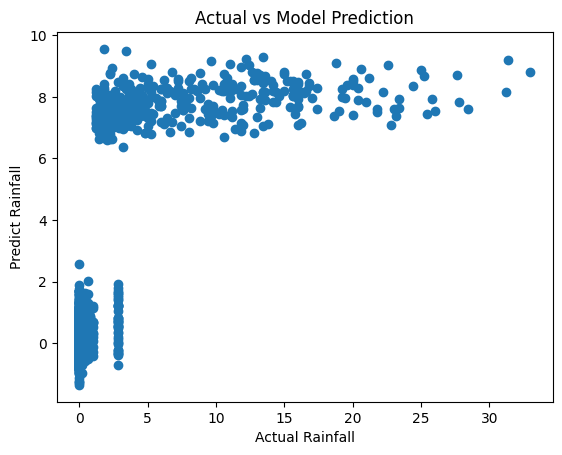

In [116]:
# Comparing the predicted data with the actual data
plt.scatter(y_test,y_pred)
plt.xlabel('Actual Rainfall')
plt.ylabel('Predict Rainfall')
plt.title('Actual vs Model Prediction')
plt.show()

**Hyperparameter Tuning of Linear Regression**

In [117]:
from sklearn.linear_model import Ridge, Lasso, RidgeCV, LassoCV

**1. LassoCV**

In [118]:
#LASSOCV will return best alpha(learning rate) after max iteration

lasscv = LassoCV(alphas= None, max_iter=100)
lasscv.fit(x_train,y_train)

LassoCV(max_iter=100)

In [119]:
alpha = lasscv.alpha_
alpha

0.0034767215254874907

In [120]:
#Now that we have best parameter,Lets use Lasso regression and see how well our data has fitted before
lasso_reg=Lasso(alpha)
lasso_reg.fit(x_train,y_train)

Lasso(alpha=0.0034767215254874907)

In [121]:
lasso_reg.score(x_test,y_test)

0.5456133217006901

We can see that with Lasso we are getting almost same score 0.5456

**2. Ridge**

In [122]:
# Ridge will return best alpha and coefficients after performing 10 Cross validation

ridgecv = RidgeCV(alphas =np.arange(0.001,0.1,0.01))
ridgecv.fit(x_train,y_train)

RidgeCV(alphas=array([0.001, 0.011, 0.021, 0.031, 0.041, 0.051, 0.061, 0.071, 0.081,
       0.091]))

In [123]:
ridgecv.alpha_

0.09099999999999998

In [124]:
ridge_model = Ridge(alpha=ridgecv.alpha_)
ridge_model.fit(x_train,y_train)

Ridge(alpha=0.09099999999999998)

In [125]:
ridge_model.score(x_test,y_test)

0.5459097857987115

We can see that with Lasso we are getting almost same score 0.5459. And there is no overfitting.

In [126]:
import pickle
filename=('Rainfall Amount Model')
pickle.dump(lr,open(filename,'wb'))

In [127]:
lr_model = pickle.load(open('Rainfall Amount Model','rb'))

In [128]:
df_zscore.head(10)

,Location,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,WindDir3pm,WindSpeed9am,WindSpeed3pm,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,RainTomorrow,Day,Month,Year
0,1,13.4,22.9,0.6,5.389395,7.632205,13,44.0,13,14,20.0,24.0,71.0,22.0,1007.7,1007.1,8.000000,4.503183,16.9,21.8,0,0,1,12,2008
1,1,7.4,25.1,0.0,5.389395,7.632205,14,44.0,6,15,4.0,22.0,44.0,25.0,1010.6,1007.8,4.566622,4.503183,17.2,24.3,0,0,2,12,2008
2,1,12.9,25.7,0.0,5.389395,7.632205,15,46.0,13,15,19.0,26.0,38.0,30.0,1007.6,1008.7,4.566622,2.000000,21.0,23.2,0,0,3,12,2008
3,1,9.2,28.0,0.0,5.389395,7.632205,4,24.0,9,0,11.0,9.0,45.0,16.0,1017.6,1012.8,4.566622,4.503183,18.1,26.5,0,0,4,12,2008
4,1,17.5,32.3,1.0,5.389395,7.632205,13,41.0,1,7,7.0,20.0,82.0,33.0,1010.8,1006.0,7.000000,8.000000,17.8,29.7,0,0,5,12,2008
5,1,14.6,29.7,0.2,5.389395,7.632205,14,56.0,13,13,19.0,24.0,55.0,23.0,1009.2,1005.4,4.566622,4.503183,20.6,28.9,0,0,6,12,2008
6,1,14.3,25.0,0.0,5.389395,7.632205,13,50.0,12,13,20.0,24.0,49.0,19.0,1009.6,1008.2,1.000000,4.503183,18.1,24.6,0,0,7,12,2008
7,1,7.7,26.7,0.0,5.389395,7.632205,13,35.0,10,13,6.0,17.0,48.0,19.0,1013.4,1010.1,4.566622,4.503183,16.3,25.5,0,0,8,12,2008
8,1,9.7,31.9,0.0,5.389395,7.632205,6,80.0,9,7,7.0,28.0,42.0,9.0,1008.9,1003.6,4.566622,4.503183,18.3,30.2,0,1,9,12,2008
9,1,13.1,30.1,1.4,5.389395,7.632205,13,28.0,8,10,15.0,11.0,58.0,27.0,1007.0,1005.7,4.566622,4.503183,20.1,28.2,1,0,10,12,2008


In [129]:
lr_model.predict(scaler.transform([[1, 9.7, 31.9, 5.389395, 7.632205, 6, 80.0, 9, 7, 7.0, 28.0, 42.0, 9.0, 1008.9, 1003.6, 4.566622, 4.503183, 18.3, 30.2, 0, 1, 9, 12, 2008]]))

array([0.44203729])